## Table of Contents
- [Introduction](#introduction)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Data Preprocessing](#data-preprocessing)
- [Modeling](#modeling)
- [Decision Tree](#decision-tree)
- [Pipeline](#pipeline)
- [Conclusion](#conclusion)

## Introduction {#introduction}

Repairability of Consumer Electronics

Andrew Chau
Summer 2023
BrainStation Toronto Data Science

This capstone project explores the success rate of repairing consumer electronics using various statistical modeling methods.


## Exploratory Data Analysis {#exploratory-data-analysis}

importing the required libraries for data manipulation (Pandas and NumPy) and visualization (MatPlotLib and Seaborn)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataset into a pandas dataframe using pd.read_csv()

In [17]:
df = pd.read_csv('Data/OpenRepairData_v0.3_aggregate_202303.csv')

quick look at the first few rows of the dataset using .head()

In [18]:
df.head(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
0,anstiftung_11539,anstiftung,DEU,Haushaltsgeräte ~ Siebträgermaschine,Coffee maker,36,Krups,1998.0,25.0,End of life,Spare parts too expensive,2711,2023-03-29,Pumpe defekt
1,anstiftung_11540,anstiftung,DEU,Elektro divers ~ Bluetooth Musik Box,Hi-Fi integrated,12,JBL,2016.0,7.0,Repairable,NaN,2711,2023-03-29,Akku lädt nicht
2,anstiftung_11541,anstiftung,DEU,Unterhaltungselektronik ~ Lautsprecher(boxen),Hi-Fi separates,13,Trust,2013.0,10.0,Fixed,NaN,2711,2023-03-29,Ohne Funktion
3,anstiftung_11542,anstiftung,DEU,Computer ~ Laptop,Laptop,16,Toshiba,2015.0,8.0,End of life,NaN,2711,2023-03-29,Netzteilbuchse und Grafikkarte defekt
4,anstiftung_11543,anstiftung,DEU,Elektro divers ~ Aktenvernichter,Paper shredder,21,Genie,2018.0,5.0,End of life,NaN,2711,2023-03-29,Getriebeschaden
5,anstiftung_11544,anstiftung,DEU,Haushaltsgeräte ~ Wasserkocher,Kettle,14,Support Plus,2018.0,5.0,End of life,No way to open product,2711,2023-03-29,ohne Funktion
6,anstiftung_11545,anstiftung,DEU,Haushaltsgeräte ~ Handrührgerät,Food processor,37,Severin,2020.0,3.0,End of life,Spare parts too expensive,2711,2023-03-29,Läuft zu schnell
7,anstiftung_11546,anstiftung,DEU,Unterhaltungselektronik ~ Radio,Portable radio,23,Philips,1993.0,30.0,Repairable,NaN,2711,2023-03-29,Kasette spielt nicht


quick look some rows at random in the dataset using .sample()

In [19]:
df.sample(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
79121,restart_16307,The Restart Project,ITA,Lamp,Lamp,15,Unknown,2009.0,10.0,Repairable,NaN,Repair Cafe Pavia,2019-12-15,Doesn't switch on
73306,restart_15705,The Restart Project,GBR,Portable radio,Portable radio,23,Roberts,2009.0,10.0,Repairable,NaN,Restarters West London,2019-11-09,Won't tune
29748,rcint_49976,Repair Café International,NLD,Computer equipment / phones ~ Printer,Printer/scanner,25,Canon,2010.0,12.0,End of life,NaN,0036,2022-12-16,printkop zit vast printkop zit vast
102165,rcwales_6593,Repair Cafe Wales,GBR,Electrical Item ~ Vacuum,Vacuum,34,Hoover,NaN,NaN,Fixed,NaN,Carmarthen,2022-07-09,"Very little suction, and dust not going throug..."
41790,rcint_27732,Repair Café International,NLD,Household appliances electric ~ Coffee maker,Coffee maker,36,Philips,NaN,NaN,End of life,NaN,0011,2020-01-11,kortsluiting boiler defect
14637,rcint_40221,Repair Café International,DEU,Household appliances electric ~ Iron,Iron,40,Siemens,2016.0,6.0,Fixed,NaN,0460,2022-11-05,"heizt einmalig auf , dann nicht mehr. Vermutet..."
48674,rcint_3321,Repair Café International,NLD,Display and sound equipment ~ Amplifier,Hi-Fi separates,13,NAD,NaN,NaN,End of life,NaN,0011,2017-11-11,onbekend elektronisch probleem werkt niet
14457,rcint_45364,Repair Café International,DEU,Household appliances electric ~ Vacuum cleaner,Vacuum,34,Vorwerk,2000.0,22.0,Fixed,NaN,0195,2022-03-19,Bürste sitzt fest Büste sitzt fest Bürste demo...


quick look at the last few rows of the dataset using .tail() <br>
good to compare and contrast with the first few rows

In [20]:
df.tail(8)

,id,data_provider,country,partner_product_category,product_category,product_category_id,brand,year_of_manufacture,product_age,repair_status,repair_barrier_if_end_of_life,group_identifier,event_date,problem
103068,rcwales_7496,Repair Cafe Wales,GBR,Electrical Item ~ Small home electrical,Small home electrical,28,Unknown,NaN,NaN,End of life,Item too worn out,Mold,2022-10-30,Malfunction.
103069,rcwales_7497,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Bernina,NaN,NaN,Repairable,NaN,Mold,2022-10-30,It is stuck on buttonhole mode and is seized up.
103070,rcwales_7498,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Jones,NaN,NaN,Repairable,NaN,Mold,2022-10-30,Unknown probably motor.
103071,rcwales_7499,Repair Cafe Wales,GBR,Electrical Item ~ Small home electrical,Small home electrical,28,Permaplug,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Extension cable for PAT testing.
103072,rcwales_7500,Repair Cafe Wales,GBR,Electrical Item ~ Misc,Misc,18,Unknown,NaN,NaN,Repairable,NaN,Mold,2022-10-30,Broken mirror.
103073,rcwales_7501,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Toyota,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Cotton reel spindle needs replacing.
103074,rcwales_7502,Repair Cafe Wales,GBR,Electrical Item ~ Sewing machine,Sewing machine,27,Brother,NaN,NaN,Fixed,NaN,Mold,2022-10-30,Bobbin not working.
103075,rcwales_7503,Repair Cafe Wales,GBR,Electrical Item ~ Vacuum,Vacuum,34,Hoover,NaN,NaN,Fixed,NaN,Mold,2022-10-30,It doesn’t turn on.


quick overview of the distribution of the numerical values using .describe()

In [21]:
df.describe()

,product_category_id,year_of_manufacture,product_age
count,103076.000000,37117.000000,37117.000000
mean,23.369417,2008.472452,12.056543
std,10.205812,14.654064,14.560084
min,1.000000,1019.000000,-1.000000
25%,15.000000,2005.000000,4.000000
50%,24.000000,2013.000000,7.000000
75%,33.000000,2017.000000,15.000000
max,40.000000,2023.000000,998.000000


quick look at the target variable - 'repair_status'

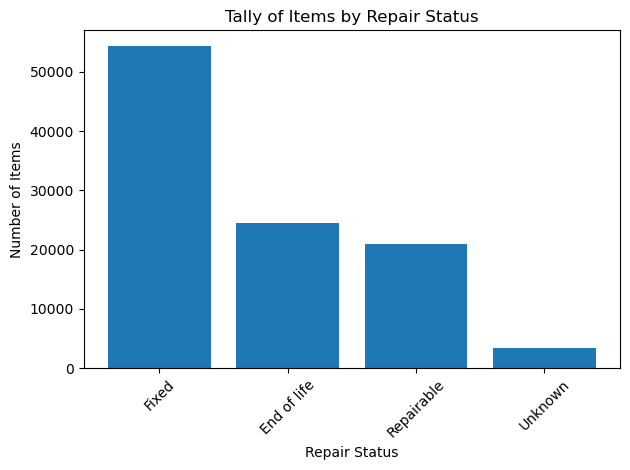

In [22]:
value_counts = df['repair_status'].value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Repair Status')
plt.ylabel('Number of Items')
plt.title('Tally of Items by Repair Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We see that the majority of items in this dataset were able to be fixed, and a further 20% or so listed as "Repairable"
A combined less than 25% are "End of Life" (fix improbable or inadvisable) or "Unknown"

Pandas crosstab of Country vs Counts of Repair Status using pd.crosstab() followed by a stacked bar chart visualizing the data

repair_status  End of life  Fixed  Repairable  Unknown
country                                               
ARG                    141    465          11        0
AUS                    245    275         111        0
AUT                     42    109          26        4
BEL                   3000   7161        3154      103
BEN                      0      6           3        0
CAN                    459   1260         696        0
CHE                     15     47          33        0
DEU                   1983   7651        2379     1462
DNK                    797   3027         389      950
ESP                    158    393         223        2
FRA                   1243   1864         893        2
GBR                   6660  13253        7144      733
HKG                     12     56         110        0
IRL                     17     83          57        0
ISL                     20     31          40        0
ISR                     49     81          36        0
ITA       

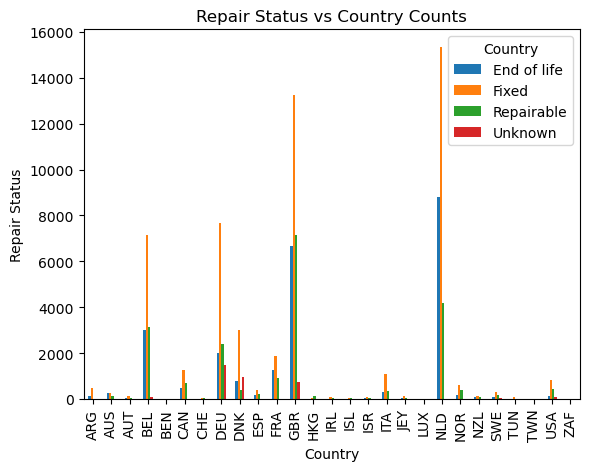

In [30]:
qf = df.copy()

cross_tab = pd.crosstab(qf['country'], qf['repair_status'])
print(cross_tab)

cross_tab.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Repair Status')
plt.title('Repair Status vs Country Counts')
plt.legend(title='Country')
plt.show()

Looks like items are able to be fixed far more often than not, irrespective of the country in which the attempt was made

In [24]:
cross_tab = pd.crosstab(qf['repair_status'], qf['brand'])
print(cross_tab)

brand          "Princess" fruitpers  (missed)  -  - onbekend  ....  /  1930s  \
repair_status                                                                  
End of life                       1         0  1           0     1  2      0   
Fixed                             0         1  3           0     0  0      0   
Repairable                        0         0  0           1     0  0      1   
Unknown                           0         0  0           0     0  0      0   

brand          1960's wooden table lamp  1960s misc  1byone  ...  zeppelin  \
repair_status                                                ...             
End of life                           0           0       1  ...         0   
Fixed                                 1           0       0  ...         0   
Repairable                            0           1       0  ...         1   
Unknown                               0           0       0  ...         0   

brand          zig zag  zigzag Deluxe Krëfel  zond

In [25]:
cross_tab = pd.crosstab(qf['repair_status'], qf['product_age'])
print(cross_tab)

product_age    -1.0     0.0     0.1     0.2     0.3     0.4     0.5     0.6    \
repair_status                                                                   
End of life         0      63       1       1       1       0      25       0   
Fixed               0     121       2       3       7       1      88       0   
Repairable          0      32       2       5       1       0      43       2   
Unknown             1       4       0       0       0       0       1       0   

product_age     0.7     0.8    ...   109.0   110.0   112.0   114.0   119.0  \
repair_status                  ...                                           
End of life         1       0  ...       0       0       0       0       0   
Fixed               0       3  ...       2       1       1       1       0   
Repairable          0       3  ...       0       2       0       0       2   
Unknown             0       0  ...       0       0       0       0       0   

product_age     120.0   121.0   122.0   123.

repair_status                      End of life  Fixed  Repairable  Unknown
product_category                                                          
Aircon/dehumidifier                        107    158         105       15
Battery/charger/adapter                    384    775         201       62
Coffee maker                              1765   3146        1226      158
DSLR/video camera                           83     99         102       33
Decorative or safety lights                383   1192         322       44
Desktop computer                           184    550         254       45
Digital compact camera                     190    196         161       28
Fan                                        256    471         124       22
Flat screen                                269    328         316       96
Food processor                            1311   2389         788      161
Games console                               93    174         109       13
Hair & beauty item       

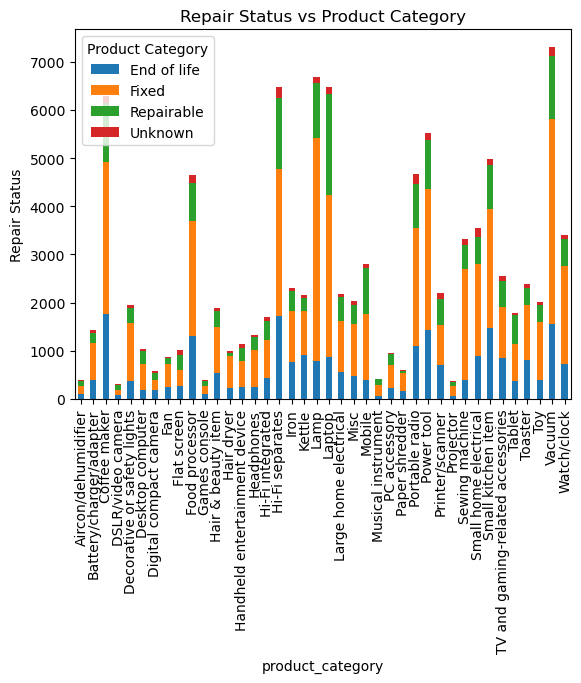

In [26]:
qf = df.copy()

cross_tab = pd.crosstab(qf['product_category'], qf['repair_status'])
print(cross_tab)

cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('product_category')
plt.ylabel('Repair Status')
plt.title('Repair Status vs Product Category')
plt.legend(title='Product Category')
plt.show()

In [27]:
sorted_category_status_proportions = category_status_proportions.sort_values(by=['Fixed'], ascending=[False])
print(sorted_category_status_proportions)



repair_status                      End of life     Fixed  Repairable   Unknown
product_category                                                              
Sewing machine                        0.115732  0.695298    0.154611  0.034358
Lamp                                  0.116926  0.692584    0.171053  0.019438
Hair dryer                            0.237952  0.653614    0.071285  0.037149
Paper shredder                        0.287395  0.623529    0.070588  0.018487
Decorative or safety lights           0.197321  0.614116    0.165894  0.022669
Watch/clock                           0.214328  0.594833    0.167352  0.023488
Toy                                   0.196429  0.593254    0.177083  0.033234
Musical instrument                    0.143204  0.582524    0.257282  0.016990
Vacuum                                0.213738  0.581828    0.179256  0.025178
Headphones                            0.194277  0.573795    0.200301  0.031627
Battery/charger/adapter               0.270042  0.54

Very promising results! Right away we can see that the top 5 categories in terms of repairability success rate are all above 60% in the "fixed" status alone, not even including the additional opportunities identified by the 'repairable' column.

While the bottom 4 product categories have a success rate of under 40% (but never lower than 30%), and about half the dataset has a success rate between 40 and 50%, the combined Fixed + Repairable count is never under 50% for any of the product categories. 

## Data Preprocessing {#data-preprocessing}

choosing a sample of data for more manageable NLP processing <br>
#ATM machine
#PIN number

In [31]:
sf = qf.sample(n=1000, random_state=1)

Vectorizing the problem column for NLP

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(sf['problem'])

vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(vectorized_df)

ValueError: np.nan is an invalid document, expected byte or unicode string.

There are significant missing values (more than half) in the year_of_manufacture and product_age columns, as with the repair_barrier_if_end_of_life column, although that only applies to items that cannot be fixed and the absolute value there is not representative of how much data is missing. 

In [ ]:
df['product_category'].value_counts()

Vacuum                               7308
Lamp                                 6688
Hi-Fi separates                      6474
Laptop                               6472
Coffee maker                         6295
Power tool                           5521
Small kitchen item                   4987
Portable radio                       4668
Food processor                       4649
Small home electrical                3551
Watch/clock                          3406
Sewing machine                       3318
Mobile                               2792
TV and gaming-related accessories    2548
Toaster                              2392
Iron                                 2294
Printer/scanner                      2202
Large home electrical                2180
Kettle                               2167
Misc                                 2037
Toy                                  2016
Decorative or safety lights          1941
Hair & beauty item                   1881
Tablet                            

In [ ]:
df['country'].value_counts()

NLD    28318
GBR    27790
DEU    13475
BEL    13418
DNK     5163
FRA     4002
CAN     2415
ITA     1762
USA     1482
NOR     1156
ESP      776
AUS      631
ARG      617
SWE      543
NZL      307
JEY      230
AUT      181
HKG      178
ISR      166
IRL      157
TUN       98
CHE       95
ISL       91
ZAF       10
BEN        9
LUX        3
TWN        3
Name: country, dtype: int64

import LabelEncoder to be able to create a heatmap using what is initially string data

In [ ]:

from sklearn.preprocessing import LabelEncoder

In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix

changing some string data to numeric for heatmap

In [ ]:
label_encoder = LabelEncoder()
df['repair_status'] = label_encoder.fit_transform(df['repair_status'])
df['country'] = label_encoder.fit_transform(df['country'])
df['brand'] = label_encoder.fit_transform(df['brand'])
df

In [ ]:
df.info()

# Correlation Heatmap

In [ ]:
#sns.heatmap(df.select_dtypes(include=['int64', 'float64', 'int32']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title("Open Repair Data Correlation Heatmap")
#plt.show()

In [ ]:
##??
df.loc[df['repair_status'] == 'Fixed']

In [ ]:
# There is very little correlation between any of the columns (besides age of the product and year of manufacture, which are redundant). I'll need to look elsewhere for meaningful insights

# Attempting to auto-translate the "problem" column

In [ ]:
# EasyNMT translation library
from easynmt import EasyNMT
model = EasyNMT("opus-mt")

df["problem"] = df.apply(lambda row: model.translate(row["problem"], target_lang="en"), axis=1)

In [ ]:
# trying to isolate language by country
df_en = df[df['country']=='GBR']
df_en

In [ ]:
#trying to isolate language by country
df_g = df[df['country']=='DEU']
df_g

In [ ]:
# attempting to use google translation library
df_g["problem"] = df_g.apply(lambda row: model.translate(row["problem"], target_lang="en"), axis=1)

In [ ]:
# dropping null values to provide cleaner data to the translator
df_g = df_g.dropna()
df_g

In [ ]:
# trying to use google translator library instead
import googletrans    
from googletrans import Translator


translator = Translator()
df_g['translated'] = df_g['problem'].apply(lambda x: translator.translate(x, dest='en').text)


In [ ]:
# trying to use google translator library
df_g["problem"] = df.apply(lambda row: model.translate(row["problem"], target_lang="en"), axis=1)

In [ ]:
import googletrans
from googletrans import Translator

In [ ]:
#backtracking to check functionality at a more basic level - code source: StackOverflow
translator = Translator()
langdict = {0: {'English': 'Hello', 'Japanese': 'こんにちは'}, 1: {'English': 'Thanks', 'Japanese': 'ありがとう'}}
df = pd.DataFrame(langdict).T
df['TranslatedText'] = df['Japanese'].apply(lambda x: translator.translate(x, src='auto', dest='en').text )
print(df)

In [ ]:
#attempting a different google translate library
pip install google_trans_new

In [ ]:
#attempting a different google translate library
from google_trans_new import google_translator

In [ ]:
#attempting a different google translate library
translator = google_translator()  
translate_text = translator.translate('Hola mundo!', lang_src='es', lang_tgt='en')  
print(translate_text)

In [ ]:
#attempting yet another translate library
pip install -U deep-translator

In [ ]:
#attempting yet another translate library
from deep_translator import GoogleTranslator
df['TranslatedText'] = df_g['problem'].apply(lambda x: GoogleTranslator.translate(x, src='auto', target='en').text)


So far, every translation library has errored out. But I'm making progress and will continue to sort out the 'problem' column to gain more insights

In [ ]:
df

In [ ]:
df2 = pd.read_csv('Data/OpenRepairData_v0.3_aggregate_202303.csv')

In [ ]:
df_quickclean = df2.dropna()

In [ ]:

X = df_quickclean['product_category_id'] # Only use the first two features so we can visualize
y = df_quickclean['repair_status']

#Plot
plt.scatter(X[y==1, 0], X[y==1, 1], s=20, c="yellow", label="Fixed")
plt.scatter(X[y==0, 0], X[y==0, 1], s=20, c="purple", label="Not fixed")
plt.legend()
plt.show()

In [ ]:
df_quickclean

# count vectorize NLP
# pd crosstab
# distribution visualizations
# logistic regression modeling
# more markdown



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#fill in na with unknown
X = df_quickclean[['product_category','country','product_age','brand']]
y = df_quickclean['repair_status']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12)

tree_model = DecisionTreeClassifier(random_state=12)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
#from sklearn.metrics import accuracy_score, confusion_matrix
# Create confusion matrix
#confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
#plt.figure(figsize=(8, 6))
#sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
           # xticklabels=tree_model.classes_,
           # yticklabels=tree_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


df_quickclean['problem_tokens'] = df_quickclean['problem'].str.split()

mlb = MultiLabelBinarizer()


onehot_encoded_words = mlb.fit_transform(df_quickclean['problem_tokens'])


onehot_encoded_df = pd.DataFrame(onehot_encoded_words, columns=mlb.classes_)


df_encoded = pd.concat([df_quickclean, onehot_encoded_df], axis=1)

df_encoded.drop(['problem', 'problem_tokens'], axis=1, inplace=True)

In [ ]:
df_encoded

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your DataFrame 'df_encoded' and 'repair_status' column

target_column = 'repair_status'
columns_to_exclude = [target_column]  # Add any columns you want to exclude from modeling

for column in df_encoded.columns:
    if column not in columns_to_exclude:
        X = df_encoded[[column]]  # Select the current column as the feature
        y = df_encoded[target_column]  # Target variable

        X_encoded = pd.get_dummies(X)  # One-hot encode categorical variables if needed

        X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12)

        tree_model = DecisionTreeClassifier(random_state=12)
        tree_model.fit(X_train, y_train)
        y_pred = tree_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for column '{column}': {accuracy:.2f}")


In [ ]:
X = df_encoded['']
y = df_encoded['repair_status']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=12)

tree_model = DecisionTreeClassifier(random_state=12)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
k=2

kmeans = KMeans(n_clusters = k)
kmeans.fit(df_quickclean)
labels = kmeans.predict(df_quickclean)

inertia = kmeans.inertia_
sil_score = silhouette_score(df_quickclean, labels)

In [ ]:
conda install XLMRobertaTokenizer from transformers

In [ ]:
import pandas as pd
from transformers import XLMRobertaTokenizer

# Load the XLM-R tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

# Create a sample DataFrame
data = {
    "description": [
        "Hello, how are you?",
        "Bonjour, comment ça va ?",
        "Hola, ¿cómo estás?",
        "Ciao, come stai?"
    ]
}
df = pd.DataFrame(data)

# Tokenize the descriptions in the DataFrame
tokenized_descriptions = []

for description in df["description"]:
    tokens = tokenizer.tokenize(description)
    tokenized_descriptions.append(tokens)

df["tokenized_description"] = tokenized_descriptions

print(df)
## In this example, the tokenizer.tokenize method is applied to each description in the "description" column of the DataFrame. The resulting tokenized sequences are stored in a new column called "tokenized_description."

## Keep in mind that tokenizing large amounts of text can be time-consuming. If you have a large DataFrame, you might want to consider using parallel processing or batching the tokenization process for better performance.







In [ ]:
import pandas as pd
from transformers import XLMRobertaTokenizer

# Load the XLM-R tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")

# Create a sample DataFrame
data = {
    "description": [
        "Hello, how are you?",
        "Bonjour, comment ça va ?",
        "Hola, ¿cómo estás?",
        "Ciao, come stai?"
    ]
}
df = pd.DataFrame(data)

# Tokenize individual words in the descriptions
tokenized_word_lists = []

for description in df["description"]:
    words = description.split()  # Split text into words
    tokens = [tokenizer.tokenize(word) for word in words]
    tokenized_word_lists.append(tokens)

df["tokenized_words"] = tokenized_word_lists

print(df)
# In this version of the code, the description text is split into individual words using the split() method. Then, the XLM-R tokenizer is applied to each word separately, resulting in tokenized sequences for individual words. The tokenized word sequences are stored in a new column called "tokenized_words."

# Please note that this approach tokenizes words within the text, and words are often broken down into subword tokens. If you want to preserve the original words while tokenizing, you might need to adapt the code accordingly.







In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = {
    "tokenized_words": [
        [["Eating"], ["a"], ["monster"], ["sandwich"]],
        [["Bonjour"], ["comment"], ["ça", "va", "?"]],
        [["Hola"], ["cómo"], ["estás", "?"]],
        [["Ciao"], ["come"], ["stai", "?"]]
    ],
    "target": [10, 20, 30, 40]  # Example target values
}
df = pd.DataFrame(data)

# Flatten tokenized words
df["flat_tokenized_words"] = df["tokenized_words"].apply(lambda x: [word for sublist in x for word in sublist])

# Convert tokenized words to text
df["text"] = df["flat_tokenized_words"].apply(lambda x: " ".join(x))

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text"])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df["target"], test_size=0.2, random_state=42)

# Initialize and train a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
label_encoders = {}
for col in df["Product_Category", "Age", "Country"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into features and target
X = df.drop("F", axis=1)
y = df["F"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

## Decision Tree {#decision-tree}

In [ ]:
wdf = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")
wdf = wdf[['repair_status', 'product_category']]

In [ ]:
wdf = wdf.drop(wdf[wdf['repair_status'] == 'Unknown'].index)
wdf['repair_status']

0         End of life
1          Repairable
2               Fixed
3         End of life
4         End of life
             ...     
103071          Fixed
103072     Repairable
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 99676, dtype: object

In [ ]:
wdf = wdf.drop(wdf[wdf['repair_status'] == 'Repairable'].index)
wdf['repair_status']

0         End of life
2               Fixed
3         End of life
4         End of life
5         End of life
             ...     
103068    End of life
103071          Fixed
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 78728, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
wdf['repair_status_encoded'] = label_encoder.fit_transform(wdf['repair_status'])

# Use one-hot encoding for 'country' and 'product_category'
data_encoded = pd.get_dummies(wdf, columns=['product_category'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop('repair_status_encoded', axis=1)
y = data_encoded['repair_status_encoded']

In [ ]:
X = X[X.columns[~X.columns.isin(['repair_status'])]]
X

,product_category_Battery/charger/adapter,product_category_Coffee maker,product_category_DSLR/video camera,product_category_Decorative or safety lights,product_category_Desktop computer,product_category_Digital compact camera,product_category_Fan,product_category_Flat screen,product_category_Food processor,product_category_Games console,...,product_category_Projector,product_category_Sewing machine,product_category_Small home electrical,product_category_Small kitchen item,product_category_TV and gaming-related accessories,product_category_Tablet,product_category_Toaster,product_category_Toy,product_category_Vacuum,product_category_Watch/clock
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103068,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
103071,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
103073,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
103074,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y

0         0
2         1
3         0
4         0
5         0
         ..
103068    0
103071    1
103073    1
103074    1
103075    1
Name: repair_status_encoded, Length: 78728, dtype: int32

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and fit the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6909691350184174


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  87 2331]
 [ 102 5353]]
              precision    recall  f1-score   support

           0       0.46      0.04      0.07      2418
           1       0.70      0.98      0.81      5455

    accuracy                           0.69      7873
   macro avg       0.58      0.51      0.44      7873
weighted avg       0.62      0.69      0.59      7873



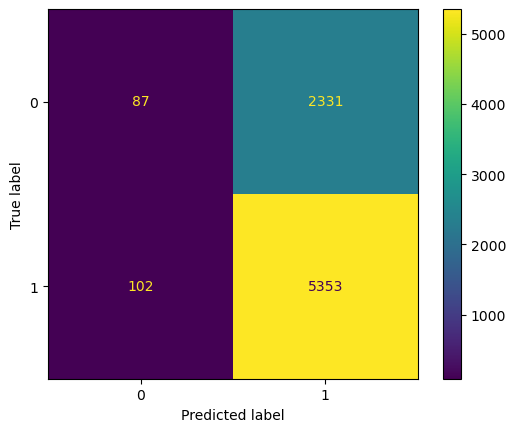

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
def PlotBoundaries(model, X, Y, dot_size=20, figsize=(10,7)) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=dot_size, edgecolor='k')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fitting the linear model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Visualize its results
PlotBoundaries(LR_model, X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"Train set accuracy: {LR_model.score(X_train, y_train)}")

InvalidIndexError: (slice(None, None, None), 0)

## Natural Langauge Processing {#NLP}

In [ ]:
ldf = pd.read_csv("data/OpenRepairData_v0.3_aggregate_202303.csv")
ldf = ldf[['repair_status', 'problem']]
ldf

,repair_status,problem
0,End of life,Pumpe defekt
1,Repairable,Akku lädt nicht
2,Fixed,Ohne Funktion
3,End of life,Netzteilbuchse und Grafikkarte defekt
4,End of life,Getriebeschaden
...,...,...
103071,Fixed,Extension cable for PAT testing.
103072,Repairable,Broken mirror.
103073,Fixed,Cotton reel spindle needs replacing.
103074,Fixed,Bobbin not working.


In [ ]:
ldf = ldf.drop(ldf[ldf['repair_status'] == 'Unknown'].index)
ldf['repair_status']

0         End of life
1          Repairable
2               Fixed
3         End of life
4         End of life
             ...     
103071          Fixed
103072     Repairable
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 99676, dtype: object

In [ ]:
ldf = ldf.drop(ldf[ldf['repair_status'] == 'Repairable'].index)
ldf['repair_status']

0         End of life
2               Fixed
3         End of life
4         End of life
5         End of life
             ...     
103068    End of life
103071          Fixed
103073          Fixed
103074          Fixed
103075          Fixed
Name: repair_status, Length: 78728, dtype: object

In [ ]:
fixed_df = ldf.loc[ldf['repair_status'] == 'Fixed']
fixed_df

,repair_status,problem
2,Fixed,Ohne Funktion
10,Fixed,Softwareproblem
11,Fixed,Klappe klemmt
12,Fixed,ohne Funktion
13,Fixed,Schalter defekt
...,...,...
103063,Fixed,Dab radiodoesn't switch on.
103071,Fixed,Extension cable for PAT testing.
103073,Fixed,Cotton reel spindle needs replacing.
103074,Fixed,Bobbin not working.


In [ ]:
fixed_df = fixed_df.fillna('blank')

In [ ]:
fixed_df['problem'].str.split(' ')

2                                   [Ohne, Funktion]
10                                 [Softwareproblem]
11                                  [Klappe, klemmt]
12                                  [ohne, Funktion]
13                                [Schalter, defekt]
                             ...                    
103063              [Dab, radiodoesn't, switch, on.]
103071        [Extension, cable, for, PAT, testing.]
103073    [Cotton, reel, spindle, needs, replacing.]
103074                       [Bobbin, not, working.]
103075                      [It, doesn’t, turn, on.]
Name: problem, Length: 54295, dtype: object

In [ ]:
simple_data = fixed_df.sample(n=1000, random_state=1)
simple_data

,repair_status,problem
37832,Fixed,brandt nt peertje kapot alles doorgemeten en m...
29129,Fixed,DVD schijfje komt er niet uit - snaar snaar v...
36257,Fixed,Na half uurtje draaien komt er rook uit de mot...
14313,Fixed,needs to be put back together loose parts put ...
69024,Fixed,Broken Screen
...,...,...
39824,Fixed,kabelbreuk
52932,Fixed,Op toestel bevindt zich een schermpje(zie foto...
45527,Fixed,Hapert Filters vervuild Filters schoongemaakt
21943,Fixed,Not working Faulty battery


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bagofwords = CountVectorizer()

bagofwords.fit(simple_data['problem'])

small_transformed = bagofwords.transform(simple_data['problem'])
small_transformed

<1000x2777 sparse matrix of type '<class 'numpy.int64'>'
	with 6846 stored elements in Compressed Sparse Row format>

In [ ]:
bagofwords.get_feature_names_out()

array(['10', '100', '11', ..., 'überbrücken', 'überbrückt', 'überprüft'],
      dtype=object)

In [ ]:
small_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# add more features
# more markdown
# multiple models
# hyperparameter tuning


In [ ]:
df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=small_transformed.toarray())
display(df)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

In [ ]:
bagofwords = CountVectorizer()


bagofwords.fit(X_train)
X_train_transformed = bagofwords.transform(X_train)
X_train_transformed

In [ ]:
X_test_transformed = bagofwords.transform(X_test)
X_test_transformed

In [ ]:
words = bagofwords.get_feature_names_out()
some_indices = range(1, 1000, round(1000/10))

samples = [words[i] for i in some_indices]
print(samples)

In [ ]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

In [ ]:
len(bagofwords.get_feature_names_out())

In [ ]:
X_train_transformed.toarray().sum(axis=0)

top 20 most frequently occuring words

In [ ]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

removing English stop words

In [ ]:
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train) 
X_test_transformed = bagofwords.transform(X_test) 

X_train_transformed.shape

bar graph of the Top 20 most frequently occurring words

In [ ]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

NameError: name 'X_train_transformed' is not defined

# Logistic Regression

setting up for logistic regression modeling. importing library 

In [ ]:
from sklearn.linear_model import LogisticRegression

fitting the model and printing the train and test scores

In [ ]:
np.random.seed(123)

logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

NameError: name 'LogisticRegression' is not defined